<a href="https://colab.research.google.com/github/HarishGarampalle/Assignment2/blob/main/HandWritten_Recognition_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hand Written Digits Recognition Models

##Importing Standard Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import seaborn as sns

##Loading the MNIST Training Dataset

In [ ]:
Mnist_train_data = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Input_Data/MNIST_train.csv')

In [ ]:
Mnist_train_data.shape

(60000, 787)

In [ ]:
Mnist_train_data = Mnist_train_data.iloc[:,2:]

In [ ]:
Mnist_train_data.shape

(60000, 785)

In [ ]:
XY_train=Mnist_train_data.to_numpy()

In [ ]:
XY_train

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [ ]:
XY_train.shape

(60000, 785)

In [ ]:
X_train=XY_train[:,1:]

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y_train=XY_train[:,0]

In [ ]:
Y_train

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# plt.figure()
# plt.hist(X_train, bins=30)
# plt.legend()

In [ ]:
# plt.figure()
# plt.hist(y, bins=20)
# plt.legend()

##Loading the MNIST Testing Dataset

In [ ]:
Mnist_test_data = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Input_Data/MNIST_test.csv')

In [ ]:
Mnist_test_data.shape

(10000, 787)

In [ ]:
XY_test = Mnist_test_data.iloc[:,2:]

In [ ]:
XY_test=XY_test.to_numpy()

In [ ]:
XY_test

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [ ]:
XY_test.shape

(10000, 785)

In [ ]:
X_test=XY_test[:,1:]

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
Y_test=XY_test[:,0]

In [ ]:
Y_test

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
Y_test.shape

(10000,)

#Normalising Dataset

##Normalise MNIST Train Data

In [ ]:
X_train_norm = X_train / 255.0

In [ ]:
X_train_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train

##Normalise MNIST Test Data

In [ ]:
X_test_norm = X_test/255.0

In [ ]:
X_test_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Classification Models

##Naive Bayes Model

In [ ]:
class GaussNB():
    def fit(self, x, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))

        for k in self.K:
            x_k = x[y == k, :]
            self.likelihoods[k] = {
                "mean": x_k.mean(axis=0),
                "cov": x_k.var(axis=0) + epsilon
            }
            self.priors[k] = len(x_k) / len(x)

    def predict(self, x):
        N, D = x.shape
        p_hat = np.zeros((N, len(self.K)))

        for k, l in self.likelihoods.items():
            p_hat[:, k] = mvn.logpdf(x, l["mean"], l["cov"]) + np.log(self.priors[k])

        return p_hat.argmax(axis=1)

In [ ]:
X_train.min(), X_train.max(), len(X_train), X_train.shape

(0.0, 1.0, 60000, (60000, 784))

##Training Naive Bayes Model

In [ ]:
hwr_NB = GaussNB()

In [ ]:
hwr_NB.fit(X_train,Y_train,epsilon=1.1e-2)

In [ ]:
def accuracy(Y_train,Yhat_train):
  return np.mean(Y_train==Yhat_train)

In [ ]:
Yhat_train = hwr_NB.predict(X_train)

In [ ]:
print('Training Accuracy of Naive Bayes Model:')
accuracy(Y_train,Yhat_train)

Training Accuracy of Naive Bayes Model:


0.8020166666666667

Confusion matrix for Normalised Training Data - Naive Bayes


Text(0.5, 47.7222222222222, 'Predicted label')

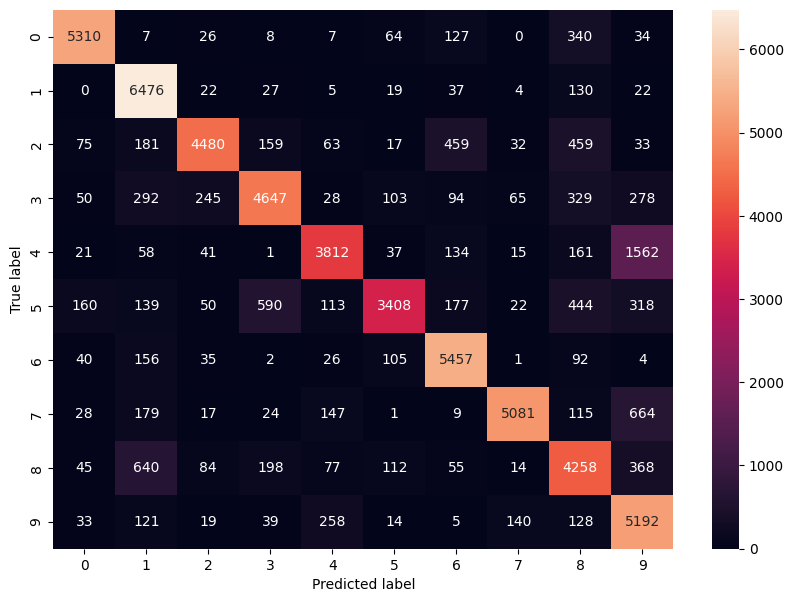

In [ ]:
print('Confusion matrix for Normalised Training Data - Naive Bayes')
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_train, name='Actual')
y_pred = pd.Series(Yhat_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Non Naive Bayes Model

In [ ]:
class GaussBayes():
  def fit(self, x, y, epsilon =1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      x_k = x[y==k,:]
      N_k,D = x_k.shape
      mu_k = x_k.mean(axis=0)

      self.likelihoods[k] = {"mean": x_k.mean(axis=0),
                             "cov":(1/(N_k-1))*np.matmul((x_k-mu_k).T,x_k-mu_k)+epsilon*np.identity(D)}

      self.priors[k]=len(x_k)/len(x)
  def predict(self, x):
    N,D = x.shape
    p_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      p_hat[:, k] = mvn.logpdf(x, l["mean"],l["cov"])+np.log(self.priors[k])
    return p_hat.argmax(axis=1)


##Training Non Naive Bayes Model

In [ ]:
hwr_NonNB = GaussBayes()

In [ ]:
hwr_NonNB.fit(X_train,Y_train, epsilon=1.1e-2)

In [ ]:
Yhat_train=hwr_NonNB.predict(X_train)

In [ ]:
print('Training Accuracy of Non Naive Bayes Model:')
accuracy(Y_train,Yhat_train)

Training Accuracy of Non Naive Bayes Model:


0.9561

Confusion matrix for Normalised Training Data - Non Naive Bayes


Text(0.5, 47.7222222222222, 'Predicted label')

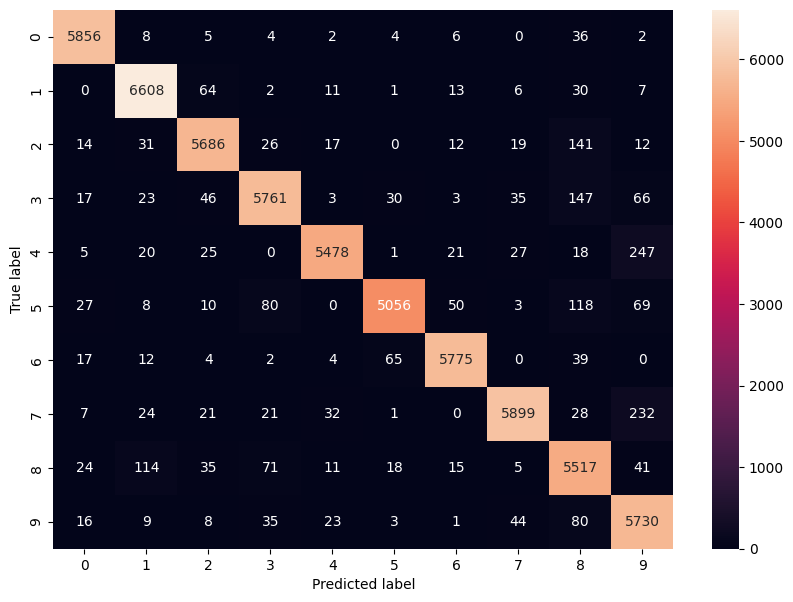

In [ ]:
print('Confusion matrix for Normalised Training Data - Non Naive Bayes')
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_train, name='Actual')
y_pred = pd.Series(Yhat_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#plt.figure(figsize=(10,6))
#plt.scatter(X[:,0],X[:,1],c=y_hat2_gbayes, alpha=0.55, s=10)

#Testing with MNIST Dataset

##Testing using Naive Bayes

In [ ]:
X_test.shape, X_test.min(), X_test.max()

((10000, 784), 0, 255)

In [ ]:
Yhat_test=hwr_NB.predict(X_test)

In [ ]:
def accuracy(Y_test,Yhat_test):
  return np.mean(Y_test==Yhat_test)

In [ ]:
Y_test.shape,Yhat_test.shape

((10000,), (10000,))

In [ ]:
print('Testing Accuracy of Navie Bayes Model:')
accuracy(Y_test,Yhat_test)

Testing Accuracy of Navie Bayes Model:


0.6135

In [ ]:
#plt.figure(figsize=(10,6))
#plt.scatter(x_test[:,0],x_test[:,1],c=y_test_hat, alpha=0.55, s=10)

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_test name='Actual')
y_pred = pd.Series(Yhat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##Testing using Non Naive Bayes

In [ ]:
Yhat_test=hwr_NonNB.predict(X_test)

In [ ]:
def accuracy(Y_test,Yhat_test):
  return np.mean(Y_test==Yhat_test)

In [ ]:
print('Testing Accuracy of Non Naive Bayes Model:')
accuracy(Y_test,Yhat_test)

Testing Accuracy of Non Navie Bayes Model:


0.7824

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_test, name='Actual')
y_pred = pd.Series(Yhat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##Testing With Normalization

##Naive Bayes model Testing

In [ ]:
Yhat_test=hwr_NB.predict(X_test_norm)

In [ ]:
def accuracy(Y_test,Yhat_test):
  return np.mean(Y_test==Yhat_test)

In [ ]:
print('Testing Accuracy of Naive Bayes Model with normalisation:')
accuracy(Y_test,Yhat_test)

Testing Accuracy of Naive Bayes Model with normalisation:


0.8146

Confusion matrix for Normalised Testing Data - Naive Bayes


Text(0.5, 47.7222222222222, 'Predicted label')

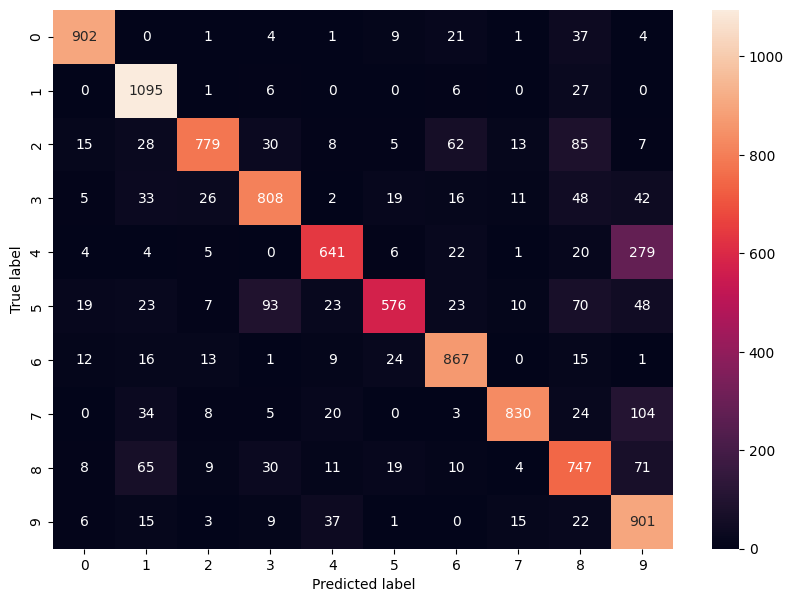

In [ ]:

print('Confusion matrix for Normalised Testing Data - Naive Bayes')
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_test, name='Actual')
y_pred = pd.Series(Yhat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##Non Naive Bayes Model testing

In [ ]:
Yhat_test=hwr_NonNB.predict(X_test_norm)

In [ ]:
def accuracy(Y_test,Yhat_test):
  return np.mean(Y_test==Yhat_test)

In [ ]:
print('Testing Accuracy of Non Naive Bayes Model with normalisation:')
accuracy(Y_test,Yhat_test)

Testing Accuracy of Non Naive Bayes Model with normalisation:


0.9485

Confusion matrix for Normalised Training Data - Non Naive Bayes


Text(0.5, 47.7222222222222, 'Predicted label')

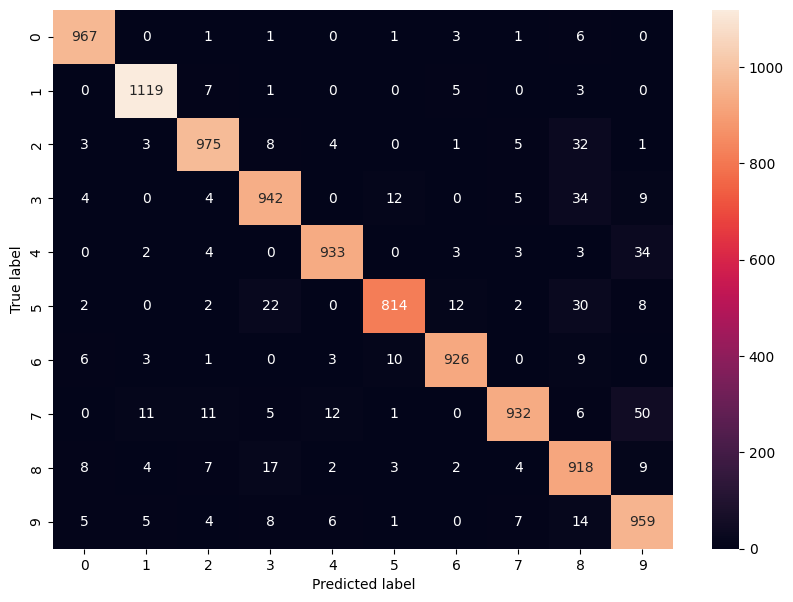

In [ ]:
print('Confusion matrix for Normalised Training Data - Non Naive Bayes')
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_test, name='Actual')
y_pred = pd.Series(Yhat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

#K Nearest Neighbours Classifier

In [ ]:
class KNNClassifier():
  def fit(self, X,y):
    self.X = X
    self.y = y
  def predict(self,X,K,epsilon = 1e-3):
    N=len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt],weights = gamma_k).argmax()
    return y_hat

##KNN Model training

In [ ]:
hwr_knn = KNNClassifier()

In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
hwr_knn.fit(X_train,Y_train)

In [ ]:
Yhat_train = hwr_knn.predict(X_train, K=8)

In [ ]:
def accuracy(Y_train,Yhat_train):
  return np.mean(Y_train==Yhat_train)

In [ ]:
print('Training Accuracy of KNN model with normalisation')
accuracy(Y_train,Yhat_train)

Training Accuracy of KNN model with normalisation


1.0

In [ ]:
print('Training Accuracy of KNN model without normalisation')
accuracy(Y_train,Yhat_train)

In [ ]:
print('Confusion matrix for Training Data - KNN Model without normalisation')
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_train, name='Actual')
y_pred = pd.Series(Yhat_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Confusion matrix for Training Data - KNN Model


Text(0.5, 47.7222222222222, 'Predicted label')

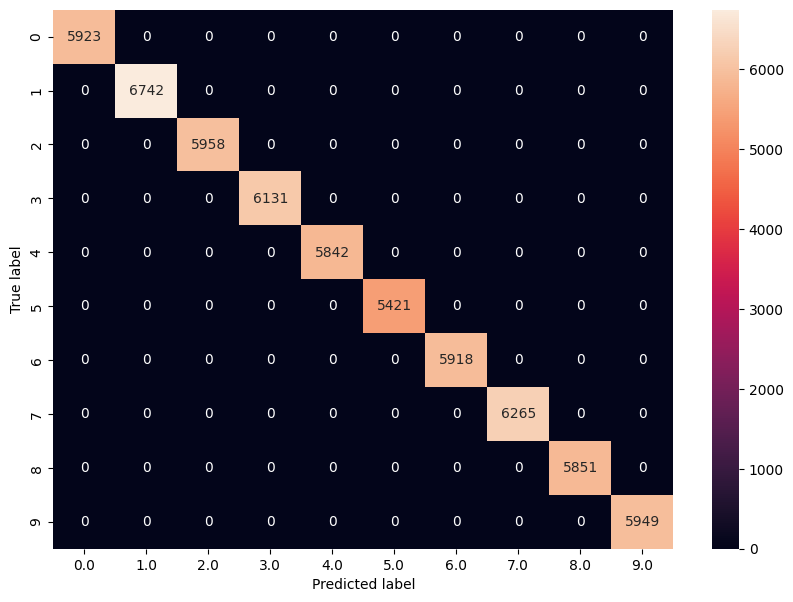

In [ ]:
print('Confusion matrix for Training Data - KNN Model')
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_train, name='Actual')
y_pred = pd.Series(Yhat_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##KNN Model testing

In [ ]:
knn_instance = KNNClassifier()

In [ ]:
Yhat_test = hwr_knn.predict(X_test, K=8)

In [ ]:
def accuracy(y_test,Yhat_test):
  return np.mean(y_test==Yhat_test)

In [ ]:
print('Testing Accuracy of KNN model')
accuracy(Y_test,Yhat_test)

Testing Accuracy of KNN model


0.9706

Confusion matrix for Testing Data - KNN Model


Text(0.5, 47.7222222222222, 'Predicted label')

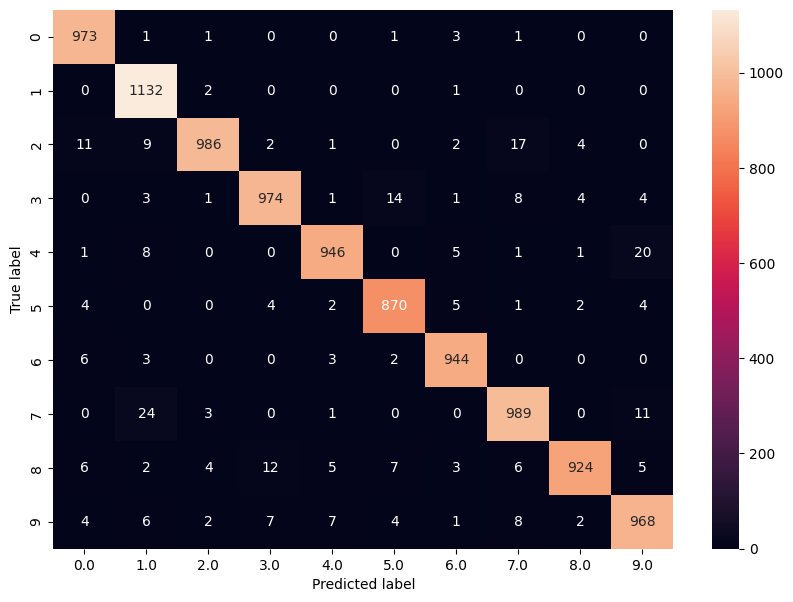

In [ ]:
print('Confusion matrix for Testing Data - KNN Model')
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_test, name='Actual')
y_pred = pd.Series(Yhat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
X_test.max()

In [ ]:
print('Testing Accuracy of KNN model without normalisation')
accuracy(Y_test,Yhat_test)

In [ ]:
print('Confusion matrix for Testing Data - KNN Model without normalisation')
plt.figure(figsize=(10,7))
y_actu = pd.Series(Y_test, name='Actual')
y_pred = pd.Series(Yhat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Practice Examples

In [ ]:
class my_object():
  def load(self, a,b):
    self.a=a
    self.b=b
    self.c=str(a)+str(b)
  def process(self):
    out = self.a+self.b
    return out,c


In [ ]:
this_variable = my_object()

In [ ]:
this_variable.load(25,"twenty-five")

In [ ]:
this_variable.c

In [ ]:
this_variable.process()

In [ ]:
this_variable.c